<a href="https://colab.research.google.com/github/ADACS-Australia/LMS-Scientific-Data-Visualization-with-Python/blob/master/Data%20visualisation%20with%20Python_w_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forewords

In this tutorial, we will cover how to make pretty plots using the Python language. In practice, the simple action of plotting data is not very hard. Making nice plots that carry meaning, however, often requires some thinking and some work.  

A rule of thumb is that if your dataset is small (say, a few data points), it is not worth creating a plot. In such case, a table or simply a description is appropriate. On the other hand, if you have many data points, potentially from different categories, a visual representation is appropriate, as looking at a long table of values can be hard to interpret. The type of plot will vary depending on the type of data and the type of information that we want to carry forward. 

-----

## Visual display of quantitative information

The title is borrowed from the title of a book by Edward Tufte (well worth a read). We can inspire ourselves from his work (and others') to lay down a few principles to help us produce good figures. 

-----

> ### Principle 1
> The visual elements communicating the data or results, or information about them, must be easily discernible.

In short, the size and font of text should be readable, and colours should be chosen appropriately to inform the viewer. A good print resolution should also be taken into account. Python (and matplotlib) includes good mechanisms for this.

![alt text](images/toosmall.jpg "Too small")**Figure 1.** A plot likely produced to be printed elsewhere. When used here, its small text is unreadable.

-----

> ### Principle 2
> The important aspects of the results (in fact, those that are deemed important to communicate) must clearly emerge. 

For example, in a table, if you want to show that your results are better than others, or want to compare results for different parameters, you should put in **bold** the best result (or those requiring attention), leaving the other values as is. This will quickly highlight the results of interest. 

![alt text](images/table.png "Highlighting")**Figure 2.** The parameters of interest to the discussion are highlighted [taken from Vohl, Fluke & Vernardos (2015)].

As far as graphics are concerned, care must be taken to ensure that the elements (labels, gridlines, legends, etc.) other than those representing data do not take on an unreasonable importance, in terms of size, number or mere visual presence. This is sometimes referred to as the [**data to ink ratio**](http://www.infovis-wiki.net/index.php/Data-Ink_Ratio). For example, there are cases where little ink (or colour if not printed) is used for the data, and a lot of ink is used for the axis, the reference grid, the labels, the ancillary elements. In general, it is better to use the *ink* for the data.

![alt text](images/data-ink.jpg "Data to ink ratio")**Figure 3.** Data to ink ratio: the amount of ink used for the lines and other features of the graph hides the actual data points [taken from Dürsteler (2002)].

-----

> ### Principle 3
> Simplicity is best.

Many software and libraries permit the creation of figures with overly complicated layout. For example, some software offer the possibility to create 3D histograms, where the depth axis is purely esthetic. It is advisable to avoid such overly complex practices. It is best to keep it to the point.

![alt text](images/figure1.png "Why 3D?")**Figure 4.** This histogram should be in represented in 2D. The use of 3D does not provide any new insights about the data. 

-----

> ### Principle 4
> Seek the balance between the mere presentation of the numerical values, and that of the phenomenon or interpretation that these values illustrate or suggest.

The most appropriate representation of results is not necessarily the easiest to precisely interpret the data. Instead, it is often the one that suggests or supports the proposed interpretation, which highlights the phenomenon in question and shows to what extent the displayed values participate in this phenomenon.

It is often the case where experimental data points (measurements) are plotted in conjunction with a model (fit). Visually, the eyes will tend to follow the line, which highlights the phenomenon (model), and will let the viewer interpret how the data agrees with the model. Other statistical measure can provide extra informations about this, too (e.g. error bars).

![alt text](images/fit.png "Relation")**Figure 5.** The figure highlights the relation between the model and the observation. To simplify the visual, the text accompanying the figure explains what the symbols represent (avoiding to over-crowd the figure). Figure taken from Wang *et al.* (2015).

-----

#### References:
[Dürsteler, J. C. 2002. Rules to make a bad graphic representation. *InfoVis*, 109.](http://web.archive.org/web/20130804015852/http://www.infovis.net/printMag.php?num=109&lang=2)

[Gales, L. 2003. "Graphics and Web Design Based on Edward Tufte’s Principles."](http://chnm.gmu.edu/digitalhistory/links/cached/chapter4/4_13b_tufte.htm)

[Tufte, Edward R. 1985. "The visual display of quantitative information." *Journal for Healthcare Quality* 7.3: 15.](https://www.edwardtufte.com/tufte/books_vdqi)

[Couture, M., & Francis, A. 2004. "Introduction aux méthodes de recherche scientifique". *Edition de la Téluq*.](http://benhur.teluq.ca/ST/sciences/sci1013/textes.htm) 

[Vohl, D., Fluke, C. J., & Vernardos, G. 2015. "Data compression in the petascale astronomy era: A GERLUMPH case study." *Astronomy and Computing* 12: 200-211.](http://www.sciencedirect.com/science/article/pii/S2213133715000578)

[Wang, J., *et al.* 2014. "An observational and theoretical view of the radial distribution of HI gas in galaxies." *Monthly Notices of the Royal Astronomical Society* 441.3: 2159-2172.](http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=2014MNRAS.441.2159W&link_type=ARTICLE&db_key=AST&high=5341dd6bb825954)

-----

## Let's get going!

I like to think that there is nothing better than learning by doing. 

### Note:
If you are not familiar with the Jupyter notebook, you simply need to press "shift"+"enter" to execute a code block

In Python, a line beginning by the symbol # is a comment

### Import modules

In [0]:
import numpy as np

from astropy.io import fits
from astropy.utils.data import download_file

from matplotlib import pyplot as plt

## Some basics : 
Configure to display plots on this webpage, generate some data, and plot. 

In [0]:
%matplotlib inline
# Uncomment the following line if you have a mac with retina display
%config InlineBackend.figure_format='retina'

In [0]:
# Set font size for labels and axes ticks (http://matplotlib.org/users/customizing.html)
from matplotlib import rc
rc('font', size=12)
rc('axes', titlesize=14)
rc('axes', labelsize=14)

In [4]:
# generate some data
x = np.arange(0, 5, 0.1)
y = np.sin(x)
print ('x =', x)
print ()
print ('y =', y)

x = [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]

y = [ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.99749499  0.9995736   0.99166481
  0.97384763  0.94630009  0.90929743  0.86320937  0.8084964   0.74570521
  0.67546318  0.59847214  0.51550137  0.42737988  0.33498815  0.23924933
  0.14112001  0.04158066 -0.05837414 -0.15774569 -0.2555411  -0.35078323
 -0.44252044 -0.52983614 -0.61185789 -0.68776616 -0.7568025  -0.81827711
 -0.87157577 -0.91616594 -0.95160207 -0.97753012 -0.993691   -0.99992326
 -0.99616461 -0.98245261]


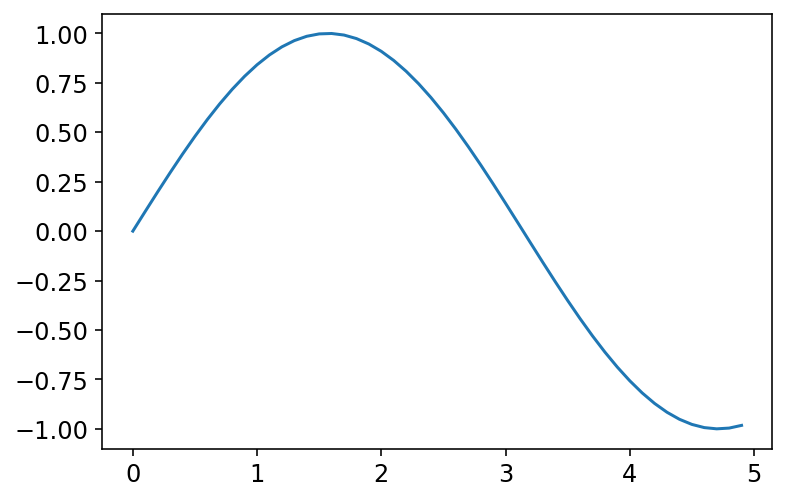

In [5]:
plt.plot(x, y)

> This isn't bad for 3 lines of code. However, we are missing some axes labels. To do so, we can add them iteratively once the plot is started.

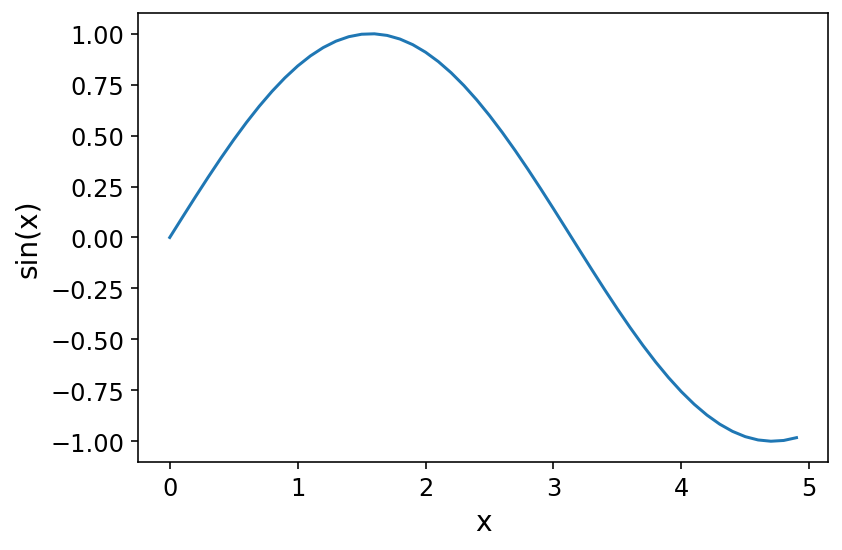

In [6]:
plt.plot(x, y) 
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.tight_layout()
plt.savefig('basic.png', dpi=300)

**We could also have plotted the values using a scatter plot like so:**

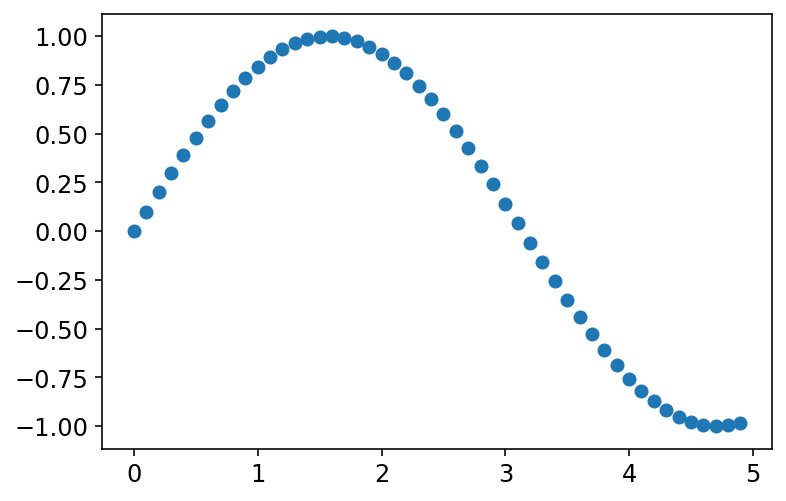

In [7]:
plt.scatter(x,y)

## When and why use one over the other? 

The type of plot depends on the type of variables. A variable can be **qualitative** or **quantitative**. A *quantitative variable* is a variable described by numbers, optionally with a unit and uncertainty. It can be **continuous** or **discrete**. 

We can also describe variables according to the relationship between them. We distinguish **independent** variables and **dependent** variables (e.g. where the value of one variable is affected by another). 

The type of variable at hand will determine the kind of visual we use: 
- **diagrams** 
> Diagrams are generally be used with independent discrete variables that are either qualitative or quantitative. Note that a table can also be used in this case, when the number of values to present is small.
    
    - diagrams include **barchart**, **histograms** (a special case of barcharts), and **boxplots**. 

- **plots** 
> Plots are used when at least one independent variable is quantitative (continuous or discrete). They are often used to show a trend in the data, to compare data with models, or to determine if there is a correlation between two variables. Another common use is *time series*. 
>
> To get back to the original question: *continuous variables* are generally represented as a line, whereas *discrete variables* are represented by symbols (circles, cross, ...).  
    
    - plots include simple **plots**, **trend plot**, **scatter plots**, etc.
    
- **figures** (e.g. photo, drawing, schematic)
> A figure may be used to present data or results when they relate to the appearance, characteristics, condition, or evolution of an object, phenomenon, or process for which a simple description would not suffice. They can also serve to explain all mathematical symbols representing quantities (distance, mass, ...) associated with the situation or the experimental set-up. Finally, they can illustrate the logical or functional links between various elements of a situation or a montage.
    
-------

# 1. Figures 
## 1.1 image
We can use the routine imshow from matplotlib to display data in image form (2D matrix)

min: 3759 max: 22918


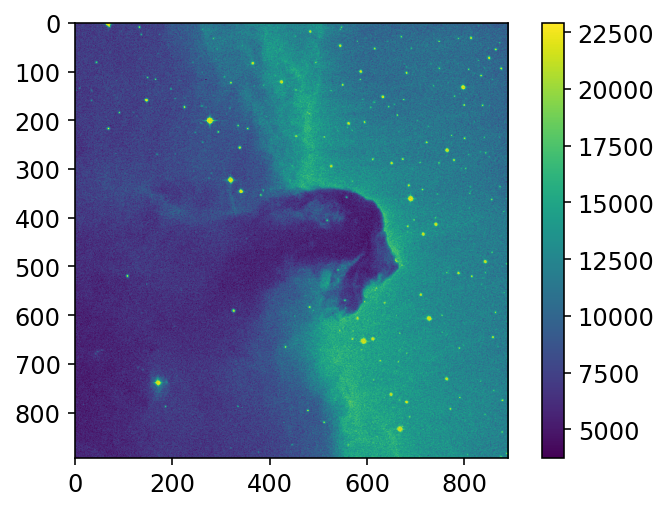

In [8]:
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', 
                           cache=True)

image_data = fits.getdata(image_file)
print ("min:", image_data.min(), 
       "max:", image_data.max())

plt.imshow(image_data)
plt.colorbar()
plt.show()

### Exercise 1
Try to hide all values smaller than 5000 and greater than 9000.  

(Remember, google is your friend.)

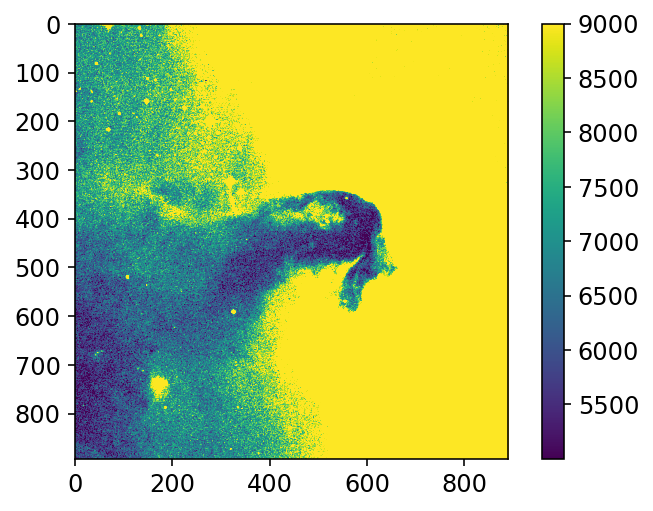

In [9]:
plt.imshow(image_data, vmin=5001, vmax=9000)
plt.colorbar()
plt.show()

### Exercise 2
Set axes ticks and labels from the fits file header with World Coordinate System. 

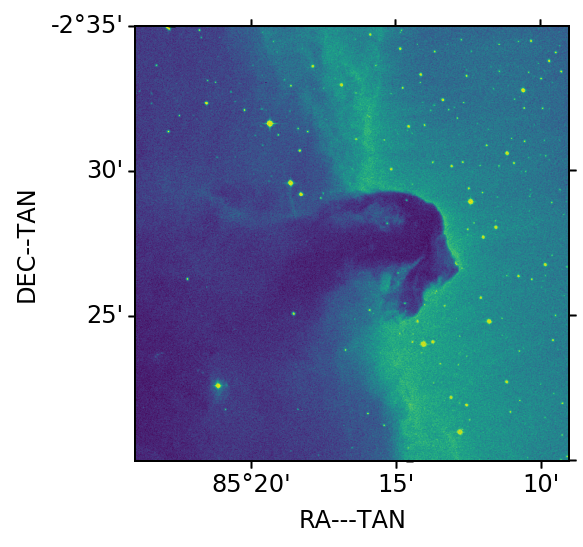

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

In [10]:
from astropy.wcs import WCS

image = fits.open(image_file)
header = image[0].header
data = image[0].data
wcs = WCS(header)

fig = plt.figure()
fig.add_subplot(111, projection=wcs)
plt.imshow(data)
plt.xlabel(header['CTYPE1'])
plt.ylabel(header['CTYPE2'])
plt.show()

header

### Exercise 3

Set a discrete colourbar (e.g. 0-5000: blue, 5000-10000: purple, etc.)

[ 3759.   5674.9  7590.8  9506.7 11422.6 13338.5 15254.4 17170.3 19086.2
 21002.1 22918. ]


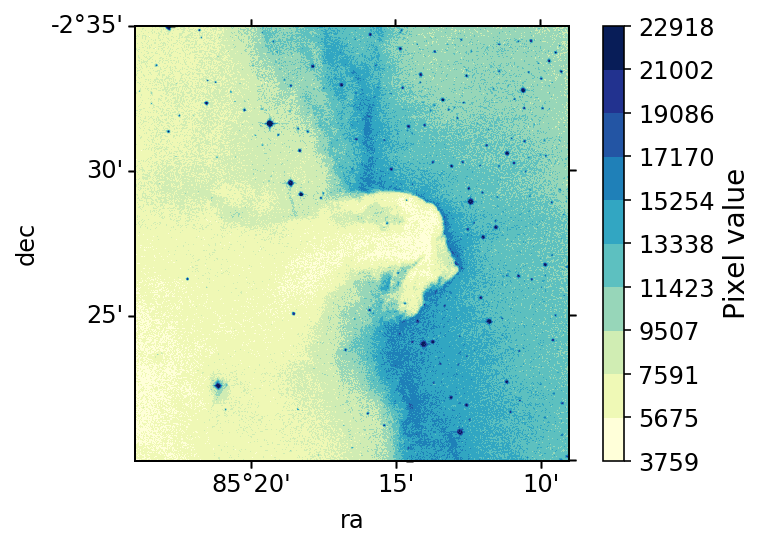

In [11]:
from matplotlib import colors

nbins = 10

# setup the plot
#fig, ax = plt.subplots(1,1, figsize=(6,6))
fig = plt.figure()
fig.add_subplot(111, projection=wcs)

# define the colormap
cmap = plt.cm.YlGnBu

# define the bins and normalize
min = np.floor(np.min(data))
max = np.floor(np.max(data)) 
bounds = np.arange(min, max+1, (max-min)/nbins)
norm = colors.BoundaryNorm(bounds, cmap.N)

print (bounds)

# make the scatter
image = plt.imshow(data, cmap=cmap, norm=norm)

plt.xlabel('ra')
plt.ylabel('dec')

cbar = plt.colorbar(image, cmap=cmap, 
             ticks=bounds, 
             boundaries=bounds)



# create a second axes for the colorbar
# cbar = plt.colorbar(image, cmap=cmap, 
#              norm=norm, ticks=bounds, 
#              boundaries=bounds)
cbar.set_label('Pixel value', fontsize=14)

# plt.tight_layout()
plt.savefig('eagle.png', dpi=300)

------

# 2. Diagrams


## 2.1 Histogram

Based on the same image, let see the pixel distribution using a histogram. 

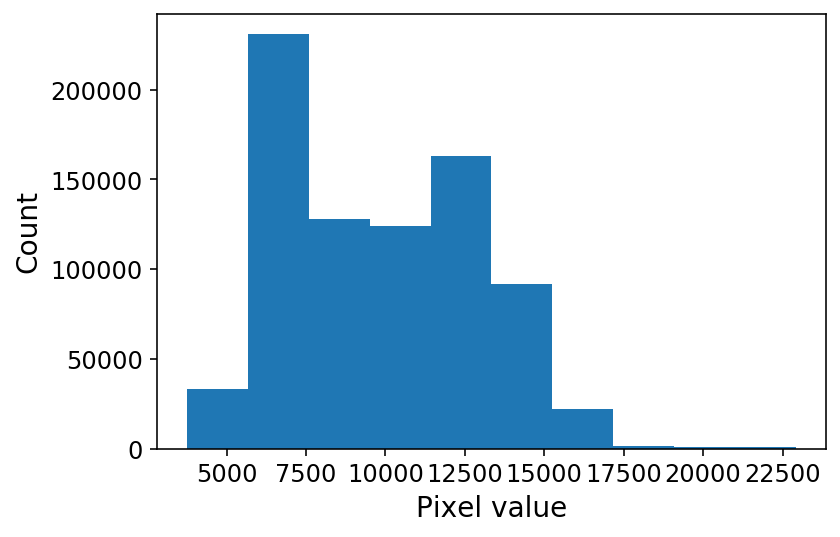

In [12]:
histogram = plt.hist(image_data.flat)
plt.xlabel('Pixel value')
plt.ylabel('Count')
plt.show()

You may have noticed this took **a while** to run! To speed things up, we can predefine the number of bins to be computed, and turn the 2D array of our image into 1D (flat).

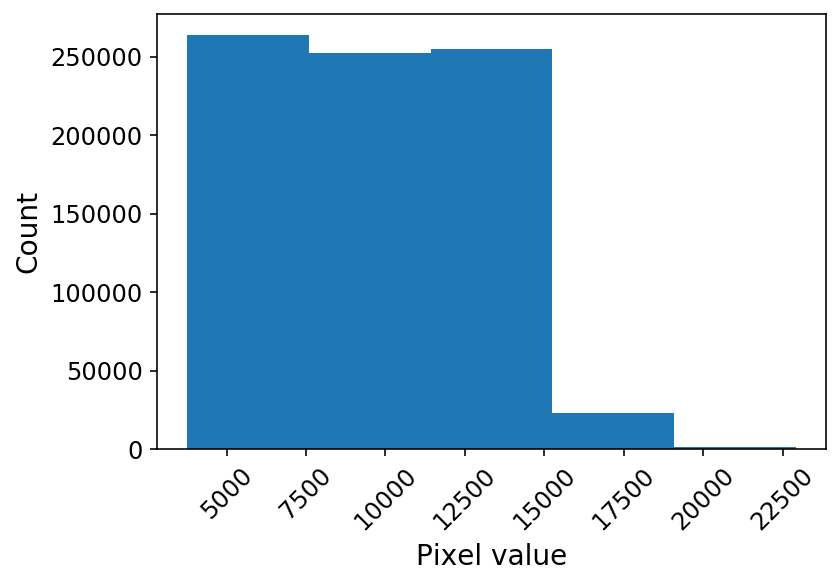

In [13]:
nbins = 5
histogram = plt.hist(image_data.flat, nbins)
plt.xlabel('Pixel value')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

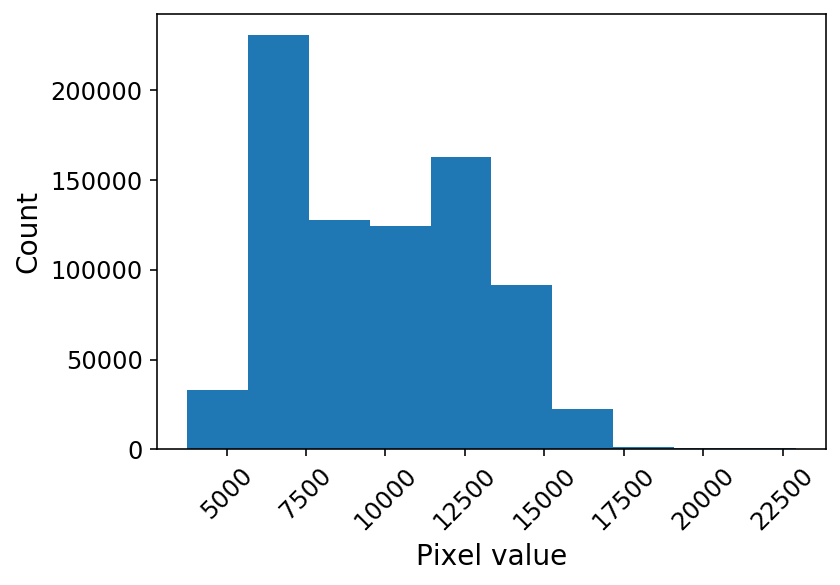

In [14]:
nbins = 10
histogram = plt.hist(image_data.flat, nbins)
plt.xlabel('Pixel value')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

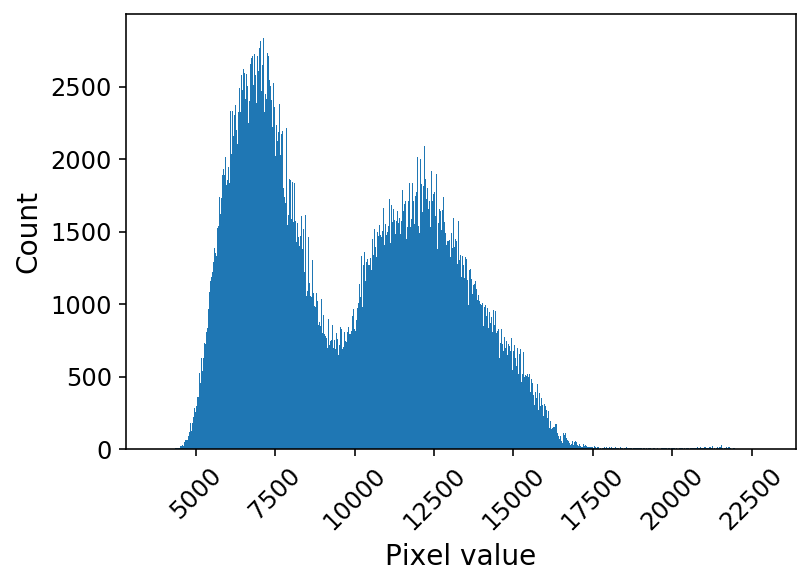

In [15]:
nbins = 1000
histogram = plt.hist(image_data.flat, nbins)
plt.xlabel('Pixel value')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

## Exercise 4

Fit this distribution.

In [17]:
help(np.diag)

Help on function diag in module numpy:

diag(v, k=0)
    Extract a diagonal or construct a diagonal array.
    
    See the more detailed documentation for ``numpy.diagonal`` if you use this
    function to extract a diagonal and wish to write to the resulting array;
    whether it returns a copy or a view depends on what version of numpy you
    are using.
    
    Parameters
    ----------
    v : array_like
        If `v` is a 2-D array, return a copy of its `k`-th diagonal.
        If `v` is a 1-D array, return a 2-D array with `v` on the `k`-th
        diagonal.
    k : int, optional
        Diagonal in question. The default is 0. Use `k>0` for diagonals
        above the main diagonal, and `k<0` for diagonals below the main
        diagonal.
    
    Returns
    -------
    out : ndarray
        The extracted diagonal or constructed diagonal array.
    
    See Also
    --------
    diagonal : Return specified diagonals.
    diagflat : Create a 2-D array with the flattened input 

[ 6880.72360919  1031.79862653  2621.85524257 12050.19718503
  2005.38780128  1711.37208081] 
 [ 7.30314566  7.35477338 14.23467188 15.53109502 17.24858891 10.4284137 ]


,params,sigma
mu1,6880.723609,7.303146
sigma1,1031.798627,7.354773
A1,2621.855243,14.234672
mu2,12050.197185,15.531095
sigma2,2005.387801,17.248589
A2,1711.372081,10.428414


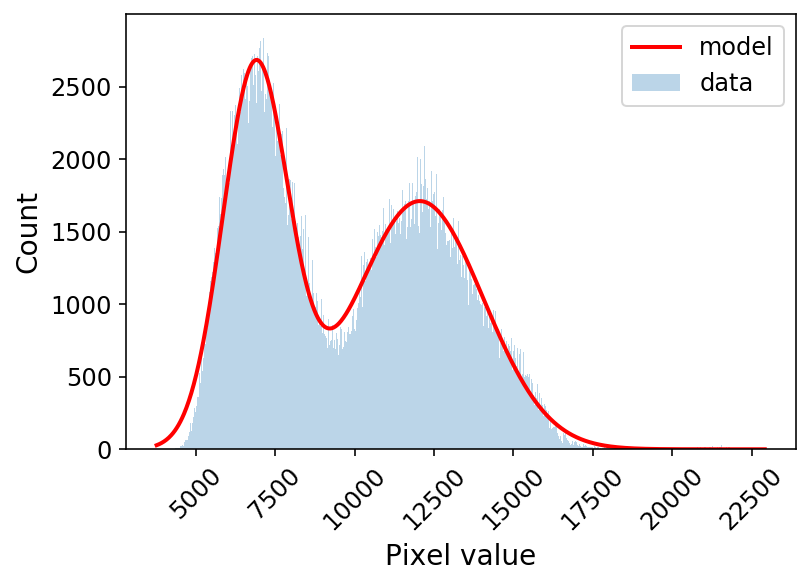

In [18]:
from pylab import *
from scipy.optimize import curve_fit

y, x, _ = plt.hist(image_data.flat,1000,alpha=.3,label='data')

x=(x[1:]+x[:-1])/2 # for len(x)==len(y)

def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

expected=(6000,1100,2500,12500,1300,2000)
params,cov=curve_fit(bimodal,x,y, expected)
sigma=sqrt(diag(cov))
plot(x,bimodal(x,*params),color='red',lw=2,label='model')
legend()
plt.xlabel('Pixel value')
plt.ylabel('Count')
plt.xticks(rotation = 45)

print(params,'\n',sigma) 

import pandas as pd
pd.DataFrame(data={'params':params,'sigma':sigma},index=bimodal.__code__.co_varnames[1:])

## Food for thoughts: 
How do you select the optimal number of bins for your histogram?
[astropy.visualisation has some good features built-in to do this, extending matplotlib.](http://docs.astropy.org/en/stable/visualization/histogram.html) You may also be interested in scipy or [scikit-learn](http://scikit-learn.org). 

------

# Barchart

A bit outside of what we just discussed, lets have a look at matplotlib's barcharts. 

## Exercise 5

Create a bar chart with data presented below. Include errorbars, and add labels to indicate the height of each bar. Make sure the colours you pick are colour blind friendly. 

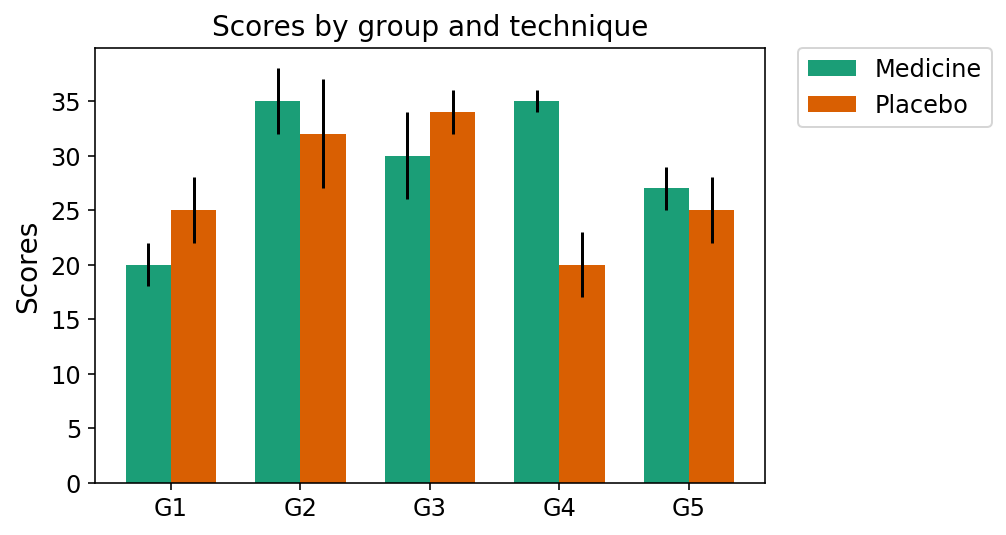

In [19]:
# We will have 5 categories
N = 5 

# Generate some data
med_means = (20, 35, 30, 35, 27)
med_std = (2, 3, 4, 1, 2)

placebo_means = (25, 32, 34, 20, 25)
placebo_std = (3, 5, 2, 3, 3)

# Specify the positions and width of the bars
ind = np.arange(N)  # the x locations for the groups
width = 0.35

# Start the figure
fig, ax = plt.subplots()

rects1 = ax.bar(ind, 
                med_means, 
                width, 
                color='#1b9e77', 
                yerr=med_std)

rects2 = ax.bar(ind + width, 
                placebo_means, 
                width, 
                color='#d95f02', 
                yerr=placebo_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and technique')
ax.set_xticks(ind + width/2)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), 
          ('Medicine', 'Placebo'),
          bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()
# ----------------------------------------------------------------
# Uncomment the following lines to get column values above the bar
# ----------------------------------------------------------------
# def autolabel(rects):
#     """
#     Attach a text label above each bar displaying its height
#     """
#     for rect in rects:
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                 '%d' % int(height),
#                 ha='center', va='bottom')
# autolabel(rects1)
# autolabel(rects2)

------
# 3. Plots


## 3.1 Box plot

### Exercise 6
Create a box plot displaying compression ratios results per technique from the file ratio.csv available in the data directory (data/ratio.csv). *Values* in the file represent a ratio in the form of *value*:1. 

Modify tick labels to make them readable. Save your plot to disk in png format, with a resolution of 300 dot per inch.

([<matplotlib.axis.XTick at 0x7f672e059748>,
 <a list of 11 Text xticklabel objects>)

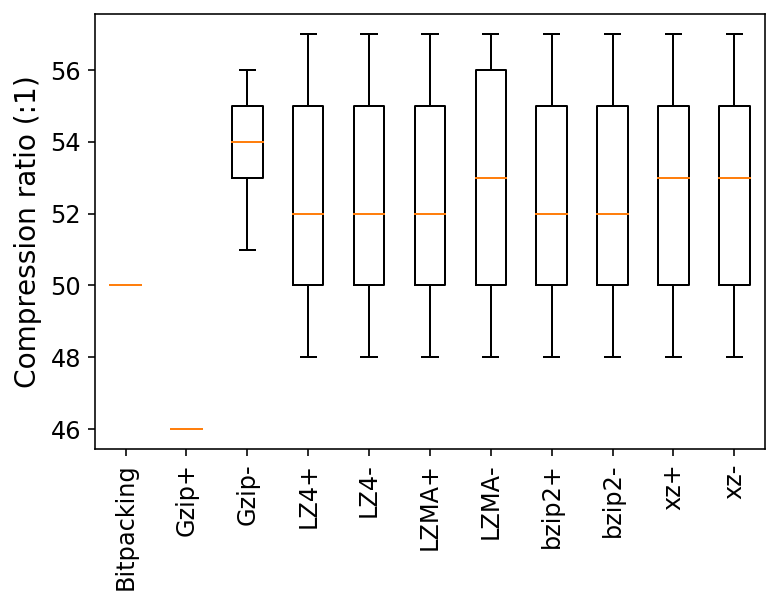

In [30]:

import urllib
filename = 'https://raw.githubusercontent.com/ADACS-Australia/LMS-Scientific-Data-Visualization-with-Python/master/data/ratio.csv'
labels = ["Bitpacking","Gzip+","Gzip-","LZ4+","LZ4-","LZMA+","LZMA-","bzip2+","bzip2-","xz+","xz-"]

def getColumn(filename, column):
    results = urllib.request.urlopen(filename)
    ii = 0
    row = []
    for result in results:
        if ii == 0:
            # Skip header
            ii += 1
        else:
            row.append(result[column])
    return row

data = []
for i in range(len(labels)):
    data.append(np.asarray(getColumn(filename,i)[1:], dtype=np.float32))

fig = plt.figure(1)
ax = fig.add_subplot(111)
bp = ax.boxplot(data, sym='+')
ax.set_ylabel('Compression ratio (:1)')
plt.xticks([x+1 for x in range(len(labels))], labels, rotation='vertical')

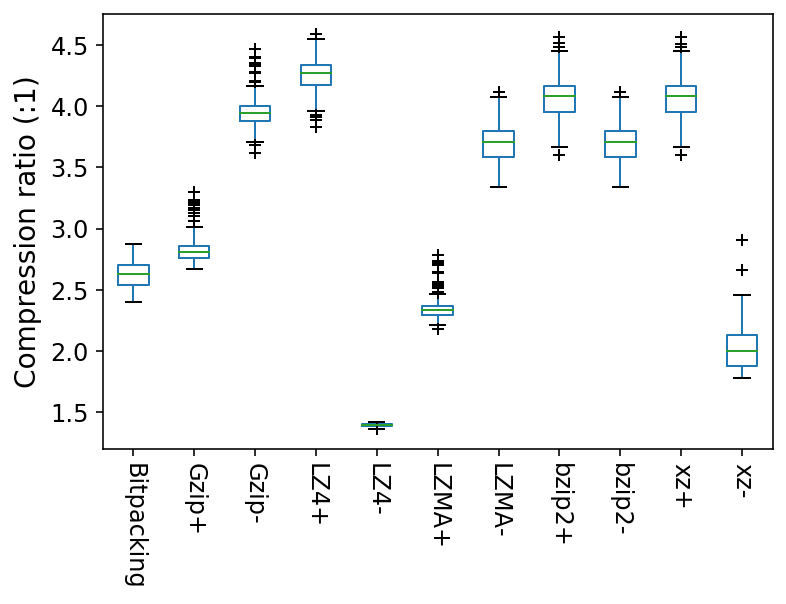

In [31]:
from pandas import read_csv
df = read_csv(filename)
ax = df.boxplot(rot=270, sym='+')
ax.grid(False)
ax.set_ylabel('Compression ratio (:1)')
plt.savefig('ratio.pdf', dpi=300, bbox_inches='tight')

## Exercise 7

Create a multi-panel box plot, where each panel is data from a different experiment (files `data/ratio-exp#.csv`). 
There is some example on how to set multiple panels if you scroll down.

In [32]:
ls data

ls: cannot access 'data': No such file or directory


Text(0.5, 0, 'Technique')

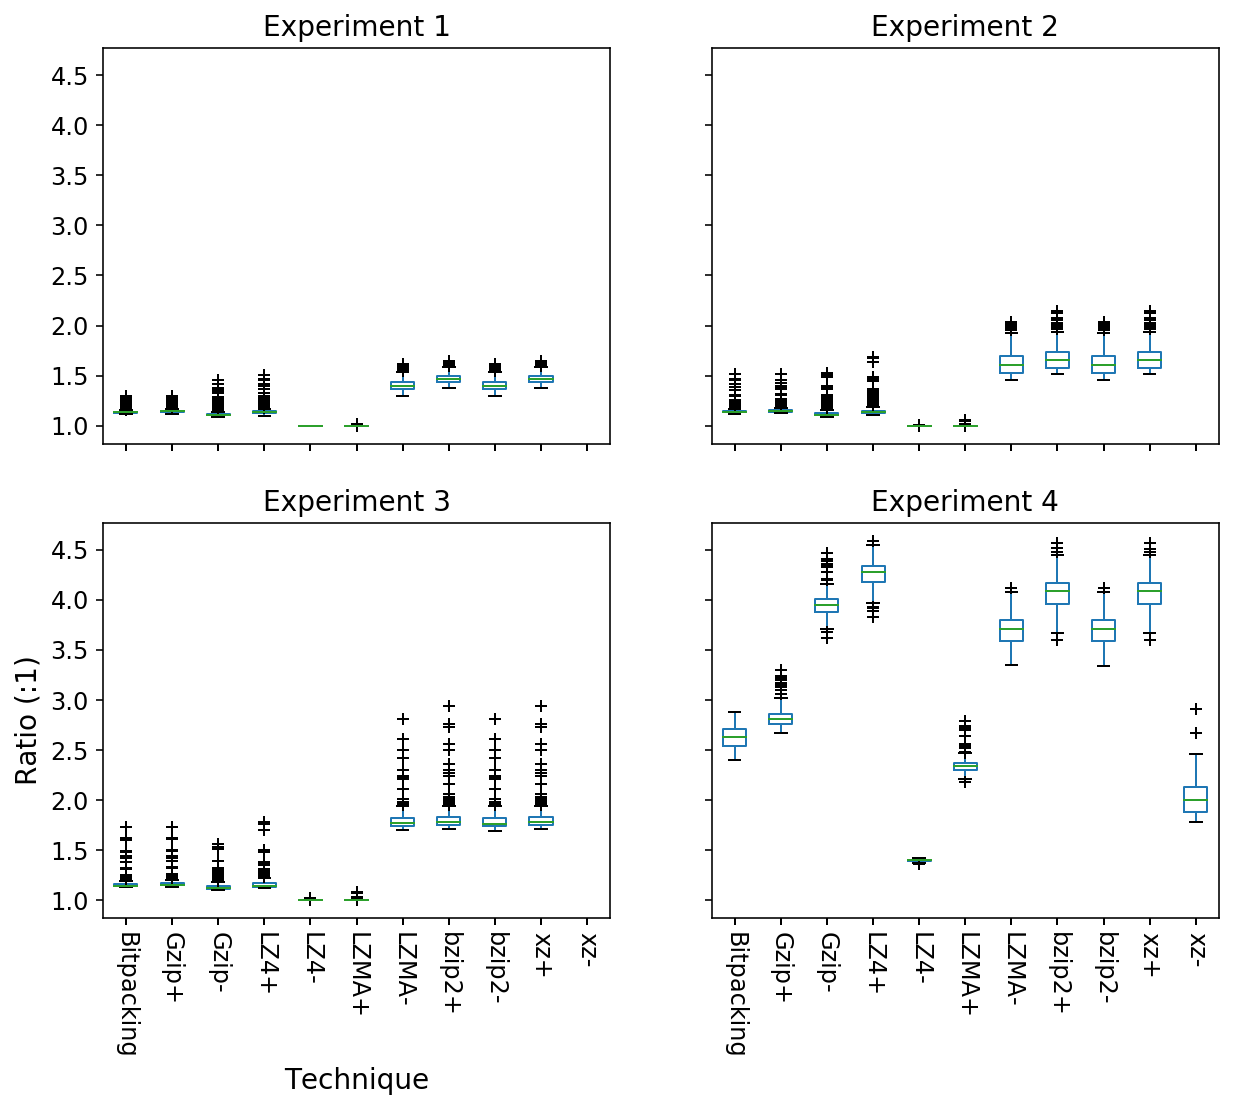

In [35]:
from pandas import read_csv

edited_filename = 'https://raw.githubusercontent.com/ADACS-Australia/LMS-Scientific-Data-Visualization-with-Python/master/data/ratio-exp'
# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True, )

x=0
y=0

# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

for i in [1,2,3,4]:
    df = read_csv(edited_filename + str(i) + '.csv')
    #whisk= dict(linestyle='solid')
    #df.boxplot(rot=270, whiskerprops=whisk, ax=axarr[y, x])
    df.boxplot(rot=270, ax=axarr[y, x], sym='+',)
    axarr[y, x].grid(False)
    axarr[y, x].set_title('Experiment ' + str(i))
    
    x += 1
    if x > 1:
        x = 0
        y += 1

axarr[1, 0].set_ylabel('Ratio (:1)')
axarr[1, 0].set_xlabel('Technique')
    
# plt.savefig('ratio.pdf', dpi=300, bbox_inches='tight')

In [37]:
df = read_csv(edited_filename+'1.csv')
df['Bitpacking']

0      1.157922
1      1.150231
2      1.276052
3      1.276183
4      1.294067
         ...   
301    1.130060
302    1.132366
303    1.132219
304    1.134195
305    1.140451
Name: Bitpacking, Length: 306, dtype: float64

-----

# Plots 

## Plot

We saw how to use plot and scatter earlier. Now, it's your turn to shine. 

There is a file called `mockdata.csv` in this folder (thanks to Ned Taylor for the data). 

## Exercise 8
Read the data and plot the poins from the first two columns

In [0]:
mock_data = "https://raw.githubusercontent.com/ADACS-Australia/LMS-Scientific-Data-Visualization-with-Python/master/data/mockdata.csv"
def exercise_3(x, y):
    plt.figure(1)
    plt.clf()
    plt.scatter(x,y,20,'k')
    plt.xlabel = 'x'
    plt.ylabel = 'y' 
    plt.show()

def read_mock_data( filename=mock_data ):
    from pandas import read_csv
    data  = read_csv(filename)
    return data

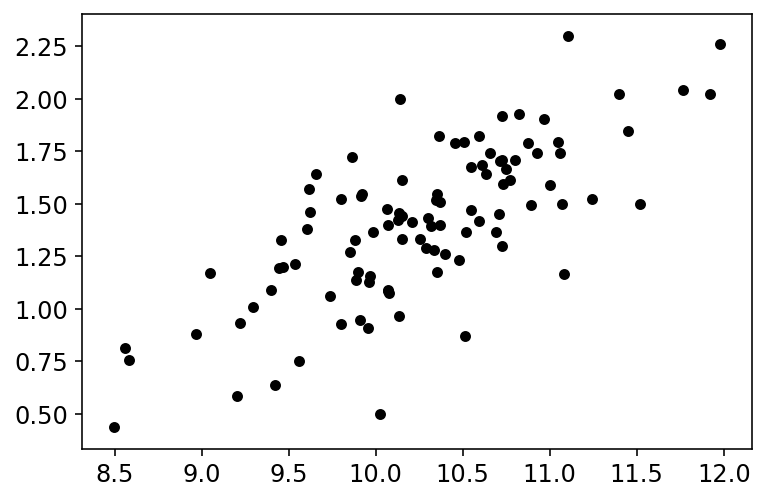

In [39]:
#x, y, dx, dy, rho = read_mock_data()
data = read_mock_data()
exercise_3(data['xdata'].values, data['ydata'].values)

## Exercise 9
Fit a line through your previous plot.

In [0]:
def exercise_4(x, y):
    plt.figure(1)
    plt.clf()
    plt.scatter(x,y,20,'k')
    plt.xlabel = 'x'
    plt.ylabel = 'y' 
    
    fit = np.polyfit(data['xdata'].values, data['ydata'].values, 1)
    xlim = np.array(plt.xlim())           
    plt.plot(xlim, np.polyval(fit, xlim), 'r-')
    
    plt.show()

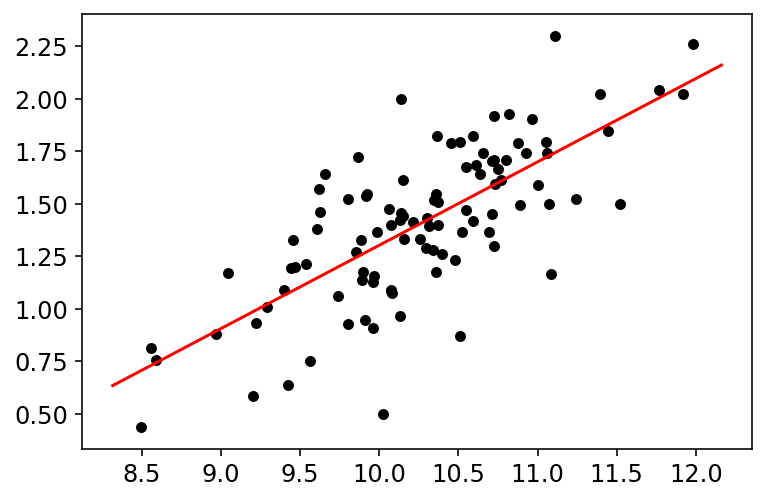

In [41]:
exercise_4(data['xdata'].values, data['ydata'].values)

### Exercise 10a: plotting hyperspectral data (Data not included!!)

The data file you need is named ``NGC_2903_RO_CUBE_THINGS.FITS``, you can download it [here](http://www.mpia.de/THINGS/Data_files/NGC_2903_RO_CUBE_THINGS.FITS). It's a 3D fits file containing a spectral cube of NGC 4826 taken from the [THINGS survey](http://www.mpia.de/THINGS/Data.html). 

For this exercise, load the data cube into memory using astropy. Then plot the spectrum at the center of the image. Use the units from the file header. 

Unfortunately the datafile was too large for us to include in our github repo!

In [0]:
cube = fits.open('THE_FITS_FILE')[0]
cube.header

In [0]:
fig, axarr = plt.subplots()

axarr.plot(cube.data[0,
                     :,
                     int(cube.data.shape[2]/2),
                     int(cube.data.shape[3]/2)])

fig.canvas.draw()
labels = [item.get_text() for item in axarr.get_xticklabels()]

header = data.header
x_min = header['CRVAL3'] - header['CRPIX3'] * header['CDELT3']
x_max = header['CRVAL3'] + header['CDELT3'] * (header['NAXIS3'] * header['CRPIX3'])

nbins = len(labels)-2
ticks_labels = [int(i) for i in np.arange(x_min, x_max, (x_max-x_min)/nbins)]

for i in range(len(labels)):
    if i != 0 and i-1 < nbins:
        labels[i] = ticks_labels[i-1]

axarr.set_xticklabels(labels)
axarr.set_xlabel(cube.header['CTYPE3'])
axarr.set_ylabel(cube.header['BUNIT'])

In [0]:
np.arange(x_min, x_max, (x_max-x_min)/nbins)

# Extra libraries to simplify your life

You can consider other libraries (often building on top of matplotlib for the plotting): 
- [pandas](http://pandas.pydata.org/pandas-docs/stable/visualization.html) (also useful for data analysis)
- [seaborn](http://seaborn.pydata.org) 
- [plotly](https://plot.ly) : to make interactive plots